# Seasonality Plots

Using ***R*** programming language.

In [1]:
import numpy as np
import pandas as pd

import rpy2
import rpy2.robjects as ro
from rpy2.robjects import r, pandas2ri

ts = r['ts']
KalmanRun = r['KalmanRun']
pandas2ri.activate()

In [2]:
%load_ext rpy2.ipython

In [3]:
df = pd.read_csv('airline_passengers.csv', index_col='Month')
df.dropna(inplace=True)
df.index = pd.to_datetime(df.index)

series = df['Thousands of Passengers']

series_ts = ts(
    series, 
    start=ro.IntVector([
        series.index[0].year,
        series.index[0].month,
        series.index[0].day
    ]),
    frequency=12
)

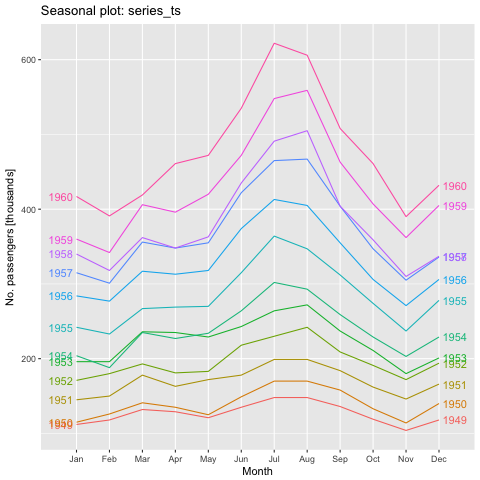

In [8]:
%%R -i series_ts

library(forecast)
library(ggplot2)

ggseasonplot(series_ts, year.labels = TRUE, year.labels.left = TRUE) + ylab("No. passengers [thousands]")